In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import os
import random
# import sys

# librosa is a Python library for analyzing audio and music. 
import librosa
import librosa.display
# import librosa.display.waveplot # seems to not exist anymore


# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# to play the audio files
import IPython.display as ipd



In [2]:
"""#Paths listed out


#Bea - Female
"/EmoV-DB_sorted/bea/Amused"
"/EmoV-DB_sorted/bea/Angry"
"/EmoV-DB_sorted/bea/Disgusted"
"/EmoV-DB_sorted/bea/Neutral"
"/EmoV-DB_sorted/bea/Sleepy"

#Jenie - Female
"/EmoV-DB_sorted/jenie/Amused"
"/EmoV-DB_sorted/jenie/Angry"
"/EmoV-DB_sorted/jenie/Disgusted"
"/EmoV-DB_sorted/jenie/Neutral"
"/EmoV-DB_sorted/jenie/Sleepy"


#Josh - Male
"/EmoV-DB_sorted/josh/Amused"
"/EmoV-DB_sorted/josh/Neutral"
"/EmoV-DB_sorted/josh/Sleepy"


#Sam - Male
"/EmoV-DB_sorted/sam/Amused"
"/EmoV-DB_sorted/sam/Angry"
"/EmoV-DB_sorted/sam/Disgusted"
"/EmoV-DB_sorted/sam/Neutral"
"/EmoV-DB_sorted/sam/Sleepy"
"""

# Don't delete! can be used for easy random path for selection

# rand_dir = 


# random_file = random.choice(os.listdir(rand_dir))




'#Paths listed out\n\n\n#Bea - Female\n"/EmoV-DB_sorted/bea/Amused"\n"/EmoV-DB_sorted/bea/Angry"\n"/EmoV-DB_sorted/bea/Disgusted"\n"/EmoV-DB_sorted/bea/Neutral"\n"/EmoV-DB_sorted/bea/Sleepy"\n\n#Jenie - Female\n"/EmoV-DB_sorted/jenie/Amused"\n"/EmoV-DB_sorted/jenie/Angry"\n"/EmoV-DB_sorted/jenie/Disgusted"\n"/EmoV-DB_sorted/jenie/Neutral"\n"/EmoV-DB_sorted/jenie/Sleepy"\n\n\n#Josh - Male\n"/EmoV-DB_sorted/josh/Amused"\n"/EmoV-DB_sorted/josh/Neutral"\n"/EmoV-DB_sorted/josh/Sleepy"\n\n\n#Sam - Male\n"/EmoV-DB_sorted/sam/Amused"\n"/EmoV-DB_sorted/sam/Angry"\n"/EmoV-DB_sorted/sam/Disgusted"\n"/EmoV-DB_sorted/sam/Neutral"\n"/EmoV-DB_sorted/sam/Sleepy"\n'

In [3]:
Emo_path = 'EmoV-DB_sorted/'
emo_actor_list = os.listdir(Emo_path) 
emo_actor_list.sort

file_actor = []
file_emotion = []
file_path = []

for dir in emo_actor_list:
    if dir.startswith('.'):
        pass
    else:
        actor = os.listdir(Emo_path + dir) 
    
        for emotions in actor:
            if emotions.startswith('.'):
                pass
            else:
                emotion = os.listdir(Emo_path + dir + '/' + emotions) 
                for file in emotion:
                    file_emotion.append(emotions.lower())
                    file_path.append(Emo_path + dir + '/' + emotions  + '/' + file)
                    file_actor.append(dir)
     

In [4]:
print(f'Number oaf file paths: {len(file_path)},\
      Number of emotions listed: {len(file_emotion)},\
      Number of actors listed: {len(file_actor)}')

Number oaf file paths: 6893,      Number of emotions listed: 6893,      Number of actors listed: 6893


In [5]:
df = pd.DataFrame({"file_path" : file_path, "actor" : file_actor})
df["sex"] = df["actor"].apply(lambda x: "female" if x in ["jenie", "bea"] else 'male')
df["emotion"] = (file_emotion)

df

,file_path,actor,sex,emotion
0,EmoV-DB_sorted/sam/Amused/amused_1-28_0022.wav,sam,male,amused
1,EmoV-DB_sorted/sam/Amused/amused_29-56_0039.wav,sam,male,amused
2,EmoV-DB_sorted/sam/Amused/amused_57-84_0066.wav,sam,male,amused
3,EmoV-DB_sorted/sam/Amused/amused_57-84_0072.wav,sam,male,amused
4,EmoV-DB_sorted/sam/Amused/amused_281-308_0287.wav,sam,male,amused
...,...,...,...,...
6888,EmoV-DB_sorted/josh/Sleepy/sleepiness_225-252_...,josh,male,sleepy
6889,EmoV-DB_sorted/josh/Sleepy/sleepiness_57-84_00...,josh,male,sleepy
6890,EmoV-DB_sorted/josh/Sleepy/sleepiness_113_140_...,josh,male,sleepy
6891,EmoV-DB_sorted/josh/Sleepy/sleepiness_197-224_...,josh,male,sleepy


### Creating a Larger Dataset with Randomized Filtering (Maybe? If I have Time )
#### Will come back to this for a more polished final product

#### 1 will add noise to many  randomized files (in random amounts but not enough to drown out speech)
#### 2 Randomly pitch up/ down data by a variable percentage (again not enough to make incomprehensible)
#### 3 Speed up/slow down (while maintaining pitch) by up to 50%
#### Can do a few pass-throughs of dataset 
#### Randomly assign 1,2, 3 or a combination to a file 


## Come back to this in the future (after MVP or after )

### Increase Dataset with new data to train on with augmented data - (add noise) add more diverse voices/accents

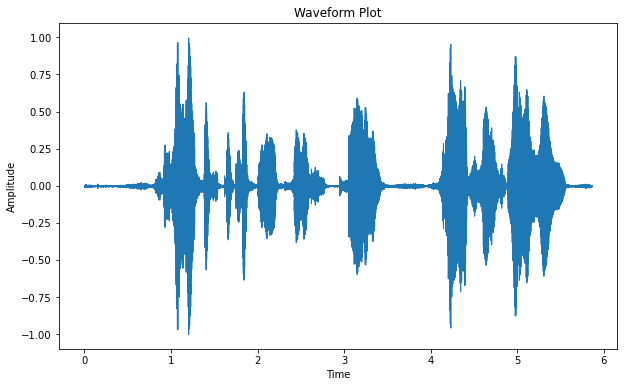

In [6]:
file_name='EmoV-DB_sorted/sam/Amused/amused_1-28_0002.wav'



audio_data, sampling_rate = librosa.load(file_name)
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.waveshow(audio_data,sr=sampling_rate)
# ipd.Audio(file_name)
ax.set(title='Waveform Plot', ylabel='Amplitude')
ax.label_outer();
# plt.savefig('img/waveforms/sam_amused_1-28_0002')





<ipython-input-7-92b8c5d0134a>:2: FutureWarning: Pass y=[-0.00014629 -0.00027912 -0.00022927 ...  0.00647387  0.00680914
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectrogram = librosa.feature.melspectrogram(audio_data)


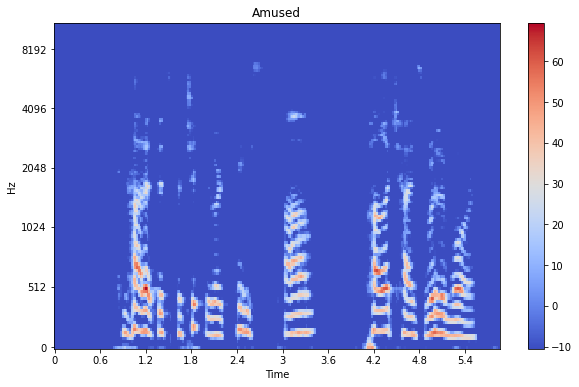

In [7]:
# Creating A basic Mel Spectrogram from our audio sample above 
spectrogram = librosa.feature.melspectrogram(audio_data)
s_db = librosa.amplitude_to_db(spectrogram)
fig, ax = plt.subplots(figsize=(10, 6))

amuse = librosa.display.specshow(s_db, sr=sampling_rate, x_axis='time', y_axis='mel', ax=ax)
ax.set(title="Amused")
fig.colorbar(amuse, ax=ax);
##plt.savefig('file/path')

In [8]:
#Once df completed 
        #go through each file path and for every WAV file make into spectogram for analysis
        #maybe it could work by just analyzing the waveform image itself??
            #break into one second chunks? anything that doesnt go above a background noise sound level 
                      #is ignored and last state detected is held as current emotion
        
        
        
        
        
        
# Save images to anaylze to new folder 
# add folder to .gitignore

We will need to agument data to account for the variablity in human speech and audio equipment 
Will add random whitenoise
Will randomly speed up/slow down audio
NO PITCH CHANGE!

Will then do Time and Frequency Masking with SpecAugment to prevent overfitting and to help the model generalise better. The masked sections are replaced with the mean value. https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5 for markdown info writeup


## Augmenting the Data

Will augment raw files and save as new randomized files in new directory_1

Will get spectrograms and save in new directory_2

Then will do Time and Frequency Masking and get finalized spectrograms and save in new directory_3

# Will come back to Data Augmentation later for MVP


# For now lets just convert to raw spectrograms for the baseline


In [47]:
# function
def spectrogrammer(path):
    
    audio_data, sampling_rate = librosa.load(path)
    
    spectro = librosa.feature.melspectrogram(audio_data)
    
    s_db = librosa.amplitude_to_db(spectro)
    
    fig, ax = plt.subplots(figsize=(20, 5))
    
    new_s = librosa.display.specshow(s_db, sr=sampling_rate, x_axis='time', y_axis='mel', ax=ax)
    
    ax.set(title=f"{path}")
    
#     fig.colorbar(new_s, ax=ax) #good for my analysis but not needed for CNN
    
    path_stripped = path.strip(".wav")
    
    unique_name = path_stripped.replace('/','__')
    
#     plt.savefig('img/spectrograms_no_aug/'+ unique_name)

<ipython-input-47-3a346aa629fc>:6: FutureWarning: Pass y=[ 0.00137336  0.00147001  0.00116713 ... -0.00192745 -0.00151542
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectro = librosa.feature.melspectrogram(audio_data)
<ipython-input-47-3a346aa629fc>:6: FutureWarning: Pass y=[0.00792341 0.00897592 0.00775321 ... 0.00335522 0.00384003 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectro = librosa.feature.melspectrogram(audio_data)
<ipython-input-47-3a346aa629fc>:6: FutureWarning: Pass y=[ 0.00341156  0.00401163  0.0038871  ... -0.00633403 -0.00698651
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectro = librosa.feature.melspectrogram(audio_data)
<ipython-input-47-3a346aa629fc>:6: FutureWarning: Pass y=[ 0.00034256  0.00026371  0.00017265 ... -0.00691141 -0.00611142
  0.        ] as keyw

0    None
1    None
2    None
3    None
4    None
Name: file_path, dtype: object

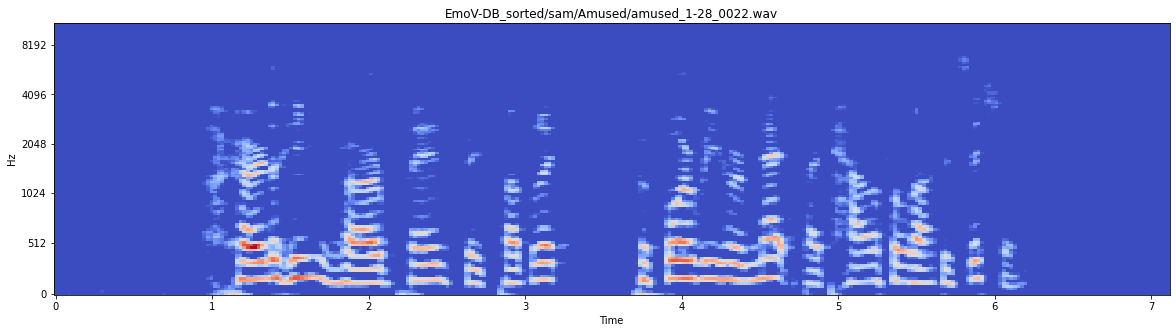

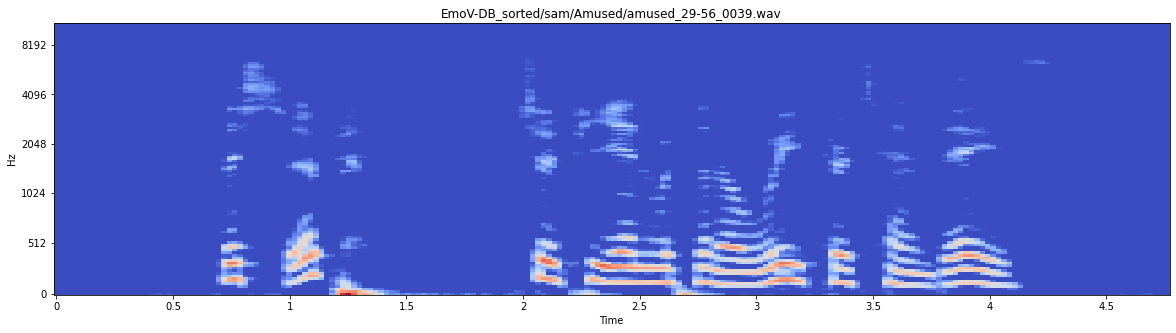

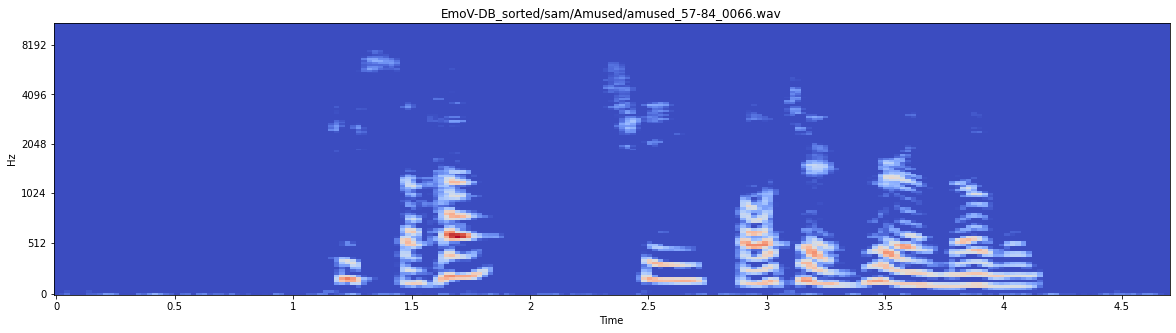

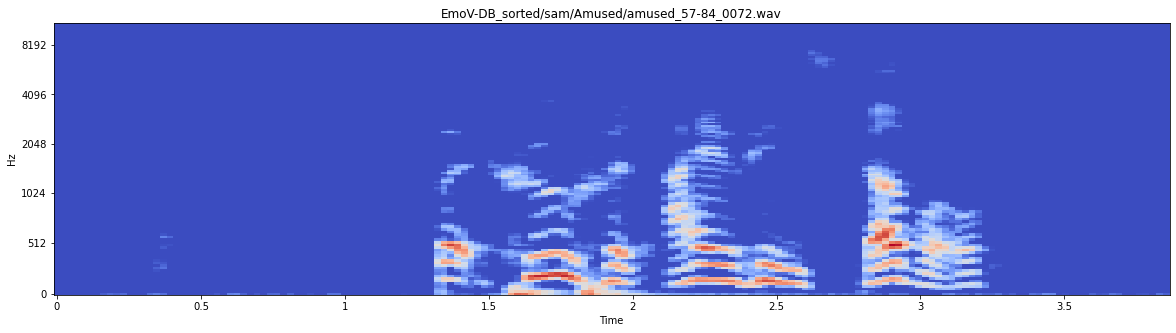

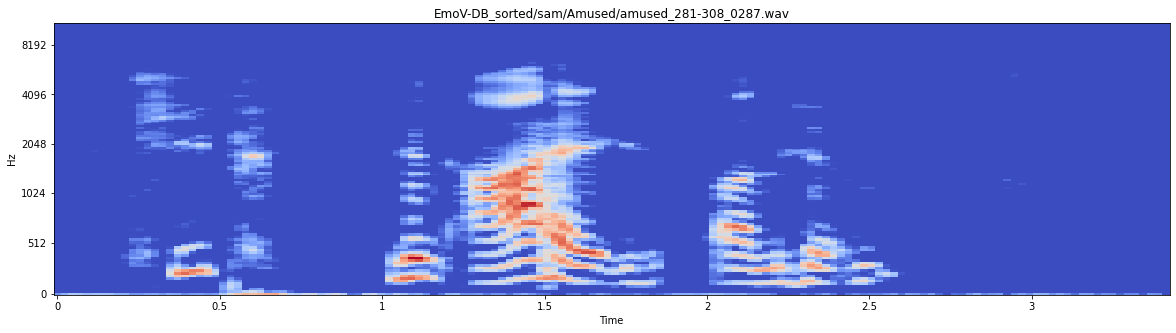

In [48]:
tester = df.head(5)

tester["file_path"].apply(lambda x: spectrogrammer(x))

In [25]:
# df["file_path"].apply(lambda x: spectrogrammer(x))

Next we need to augment our data in order to prevent over-fitting and make our model more generalizable.
We will do this by injecting noise, slowing the sound clips, speeding up the sound clips, and 

We will then extract features, trim the data, extract features without augmentation, add noise a and vertically stack (essentially stacking an array and turning into a matrix which we will then convert to our spectrogram, then add stretch vert stack, and pitch v stack )

In [111]:
def noise(data):
    amplitude = 0.05*np.random.uniform()*np.amax(data)
    data = data + amplitude*np.random.normal(size=data.shape[0])
    return data

def speed_random(data):
    random_rate = round(random.uniform(0.5, 1.5), 2)
    return librosa.effects.time_stretch(data, random_rate)


def pitch(data, sampling_rate):
    random_pitch = round(random.uniform(.5, 3), 1)
    return librosa.effects.pitch_shift(data, sampling_rate, random_pitch)



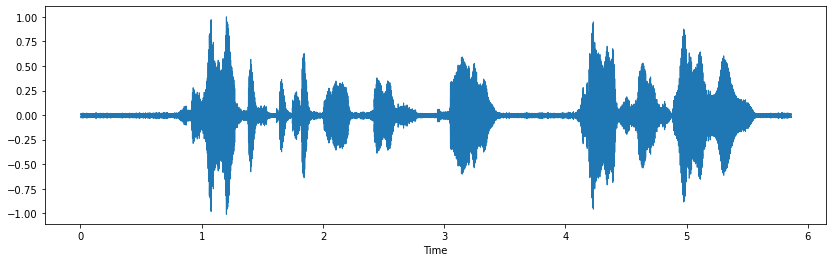

In [112]:
file_name='EmoV-DB_sorted/sam/Amused/amused_1-28_0002.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate) #Base Audio


x = noise(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

<ipython-input-111-9c8af48155c3>:8: FutureWarning: Pass rate=1.4 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, random_rate)


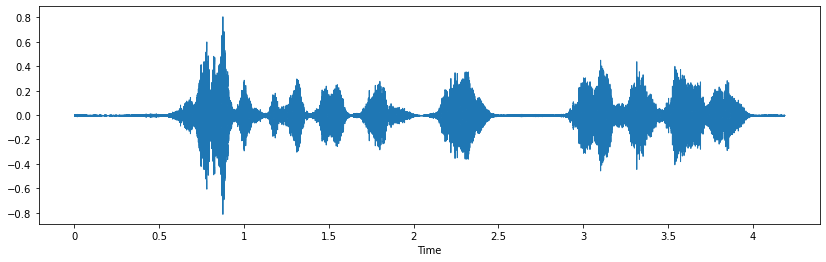

In [113]:
file_name='EmoV-DB_sorted/sam/Amused/amused_1-28_0002.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate)
x = speed_random(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

<ipython-input-111-9c8af48155c3>:13: FutureWarning: Pass sr=22050, n_steps=2.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, random_pitch)


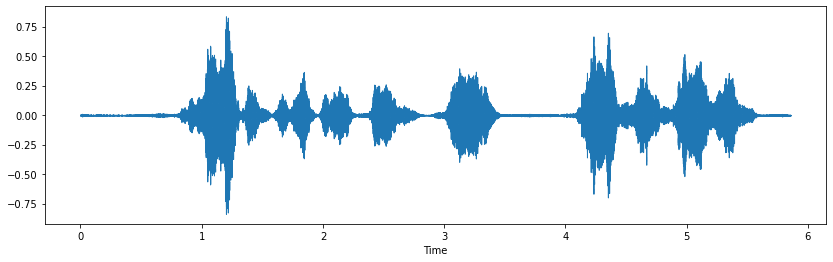

In [114]:
file_name='EmoV-DB_sorted/sam/Amused/amused_1-28_0002.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate)
x = pitch(audio_data, sampling_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

### Low Hanging Fruit Visuals

In [ ]:
#once We have all data and its been combined with artifical data do some low hanging fruit models
#Bar graph of percent of data that is each emotion
#Male vs female
#Each actor's percent of total
# each actor's percent of each emotion


# - List of Emotion classes
# - Count of # of files for each speaker
# - Count of # files male vs female
# - Count of # files per emotion - percentage

In [ ]:
#Perform test train split - .25% test

In [ ]:
#Consider switch to google colab for processing power

#Baseline Idea.  if line/waveform do multinomial naive bayes
# images unforuntately have to do a cnn